In [1]:
import pandas as pd
import numpy as np
import tejapi
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import statsmodels.api as sm
import xgboost as xgb
from sklearn import preprocessing
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 解決 plot中文問題
plt.rcParams['axes.unicode_minus'] = False
tejapi.ApiConfig.api_key = "Your Key"
tejapi.ApiConfig.ignoretz = True

In [2]:
taipower = tejapi.get('GLOBAL/WTPC',  #從TEJ api撈取所需要的資料
                  chinese_column_name = True,
                  paginate = True)

In [3]:
df = tejapi.get('TWN/EWIPRCD',  #從TEJ api撈取所需要的資料
                  chinese_column_name = True,
                  paginate = True,
                  mdate = {'gt':'2019-12-31'},
                  idx_id = 'IR0032',
                  opts={'columns':['idx_id','mdate','close_d']})

In [ ]:
_2327 = tejapi.get('TWN/APRCD1',  #從TEJ api撈取所需要的資料
                  chinese_column_name = True,
                  paginate = True,
                  mdate = {'gt':'2019-12-31'},
                  coid = '2327',
                  opts={'columns':['coid','mdate','close_adj']})

In [5]:
taipower['產業名稱'].unique()

array(['EMS', 'IC封測', 'IC設計', 'LCD 面板', 'LED', 'PCB', 'PCB材料', 'PC系統',
       'PC週邊', '二極體及石英元件', '太陽能', '主機板', '主機板及工業電腦', '半導體', '光元件模組',
       '光電/ IO', '光學鏡頭', '沖壓及散熱元件', '其他半導體', '背光模組及其他原料', '消費性電子', '記憶體',
       '被動元件', '通訊設備', '連接器', '晶圓代工', '電子設備', '電子零組件', '電源供應器', '電機設備',
       '機殼', '觸控及其他面板'], dtype=object)

In [6]:
taipower1 = taipower[taipower['產業名稱'] =='電子零組件']
taipower1.set_index('日期', inplace=True)

In [17]:
df2 = taipower1[['收盤']].merge(df[['日期', '指數收盤價']], on='日期')
df2.set_index(df2['日期'], inplace=True)
df2.drop(columns={'日期'}, inplace=True)
df2.rename(columns={'收盤':'動態指數', "指數收盤價":'收盤價'}, inplace=True)
df2

,動態指數,收盤價
日期,,
2020-01-02,97.556,205.04
2020-01-03,97.412,205.97
2020-01-06,96.516,202.18
2020-01-07,95.219,196.79
2020-01-09,92.182,197.83
...,...,...
2022-08-25,158.946,294.74
2022-08-26,158.338,295.93
2022-08-29,156.518,288.01


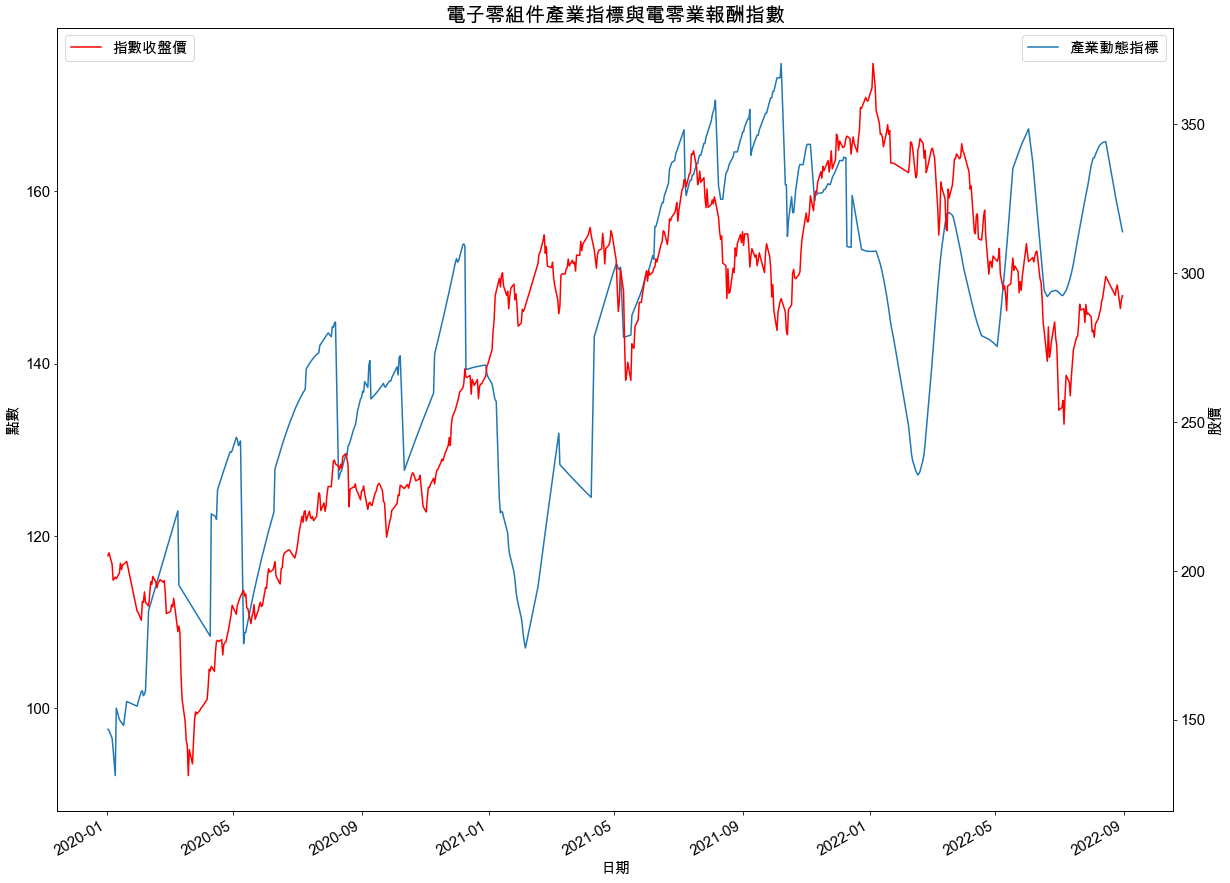

In [18]:
fig, ax1= plt.subplots(figsize =(20,16))
plt.plot(df2.index , df2['動態指數'],lw=1.5, label = '產業動態指標')                                       
plt.xlabel('日期',fontsize=15)
plt.ylabel('點數', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('電子零組件產業指標與電零業報酬指數',  fontsize=20)
plt.legend(loc=1, fontsize=15) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df2.index, df2['收盤價'] , lw=1.5, color='r', label='指數收盤價')
plt.ylabel('股價', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=2, fontsize=15)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [23]:
df2

,動態指數,收盤價
日期,,
2020-01-02,97.556,205.04
2020-01-03,97.412,205.97
2020-01-06,96.516,202.18
2020-01-07,95.219,196.79
2020-01-09,92.182,197.83
...,...,...
2022-08-25,158.946,294.74
2022-08-26,158.338,295.93
2022-08-29,156.518,288.01


In [27]:
df2['平移'] = df2['收盤價'].shift(-40) #台電產業與營收 領先40日

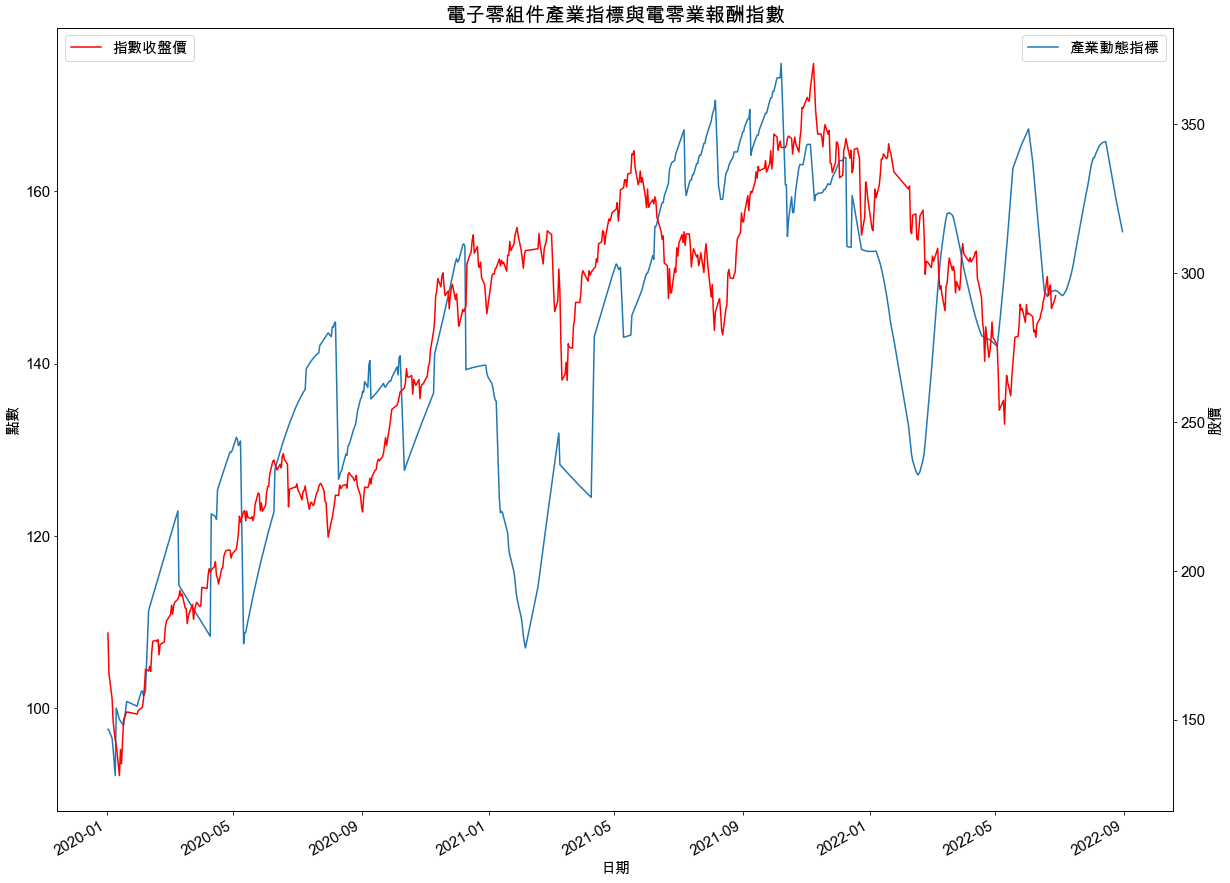

In [28]:
fig, ax1= plt.subplots(figsize =(20,16))
plt.plot(df2.index , df2['動態指數'],lw=1.5, label = '產業動態指標')                                       
plt.xlabel('日期',fontsize=15)
plt.ylabel('點數', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('電子零組件產業指標與電零業報酬指數',  fontsize=20)
plt.legend(loc=1, fontsize=15) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df2.index, df2['平移'] , lw=1.5, color='r', label='指數收盤價')
plt.ylabel('股價', fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=2, fontsize=15)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [ ]:
# cycle, trend = sm.tsa.filters.hpfilter(df2['收盤'], 129600)
# df2['cycle'] = cycle
# df2['trend'] = trend

In [ ]:
# cycle, trend = sm.tsa.filters.hpfilter(df1['指數收盤價'], 129600)
# df1['cycle'] = cycle
# df1['trend'] = trend
# df1

In [ ]:
# adf_res1, pvalue1, critvalues1, resstore1 = adfuller(df3['指數報酬'], regression = 'c', autolag='bic', regresults=True)

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# df1[['指數收盤價','trend']].plot(ax=ax, fontsize=16)
# plt.show() #把trend跟原始資料畫在圖上

In [ ]:
# fig, ax = plt.subplots(figsize=(12,8))
# df2[['收盤','trend']].plot(ax=ax, fontsize=16)
# plt.show() #把trend跟原始資料畫在圖上

In [ ]:
# df1['後移'] = df1['指數收盤價'].shift(-30)
# df1

In [ ]:
# df2 = df2.set_index(df2['日期'])
# df3['平移'] = df3['指數收盤價'].shift(-40)
# df2

In [29]:
df2

,動態指數,收盤價,平移
日期,,,
2020-01-02,97.556,205.04,179.03
2020-01-03,97.412,205.97,165.41
2020-01-06,96.516,202.18,157.02
2020-01-07,95.219,196.79,149.31
2020-01-09,92.182,197.83,143.08
...,...,...,...
2022-08-25,158.946,294.74,NaN
2022-08-26,158.338,295.93,NaN
2022-08-29,156.518,288.01,NaN


In [30]:
df2['stand_X'] = preprocessing.scale(df2['動態指數'])
df2['stand_y'] = preprocessing.scale(df2['平移'])

In [ ]:
# df2['10ma'] = df2['收盤'].rolling(20).mean()
# df2

In [ ]:
# df3['收盤報酬'] = df3['收盤'].pct_change(1)
# df3['指數報酬'] = df3['指數收盤價'].pct_change(1)

In [ ]:
# df3['stand_10ma'] = preprocessing.scale(df3['10ma'])
# df3

In [ ]:
# df3['指數報酬'] = df3['指數收盤價'].pct_change(1)
# df3['產業報酬'] = df3['收盤'].pct_change(1)

In [ ]:
# df3['label'] = np.where(df3['收盤報酬']>0,1,0)
# df3

In [ ]:
# df2['stand_y'] = df2['stand_y'].shift(-1)

In [ ]:
df2['stand_X'] = preprocessing.scale(df2['動態指數'])
df2['stand_y'] = preprocessing.scale(df2['平移'])


In [33]:
df2.dropna(inplace=True)
X = df2[['stand_X']]
y = df2[['stand_y']]
X_train, X_test = X.loc[:"2021-12-31"], X.loc["2021-12-31":]
y_train, y_test = y.loc[:"2021-12-31"], y.loc["2021-12-31":]

In [ ]:
X_train

In [ ]:
y_test

In [ ]:
# param_dist = {
#         'n_estimators':range(100,510,10)}
#         'max_depth':range(2,15,1),
#         'learning_rate':np.linspace(0.01,2,20),
#         'subsample':np.linspace(0.7,0.9,20),
#         'colsample_bytree':np.linspace(0.5,0.98,10),
#         'min_child_weight':range(1,9,1)}

In [ ]:
# rd = RandomizedSearchCV(model, param_dist, cv=5, n_iter=100, n_jobs=-1 ,scoring='r2')

In [ ]:
# rd.fit(X_train, y_train)

In [ ]:
# rd.best_params_

In [ ]:
model = XGBRegressor(n_estimators=250)
model.fit(X_train, y_train, verbose=True)
y_pred_train = model.predict(X_train)

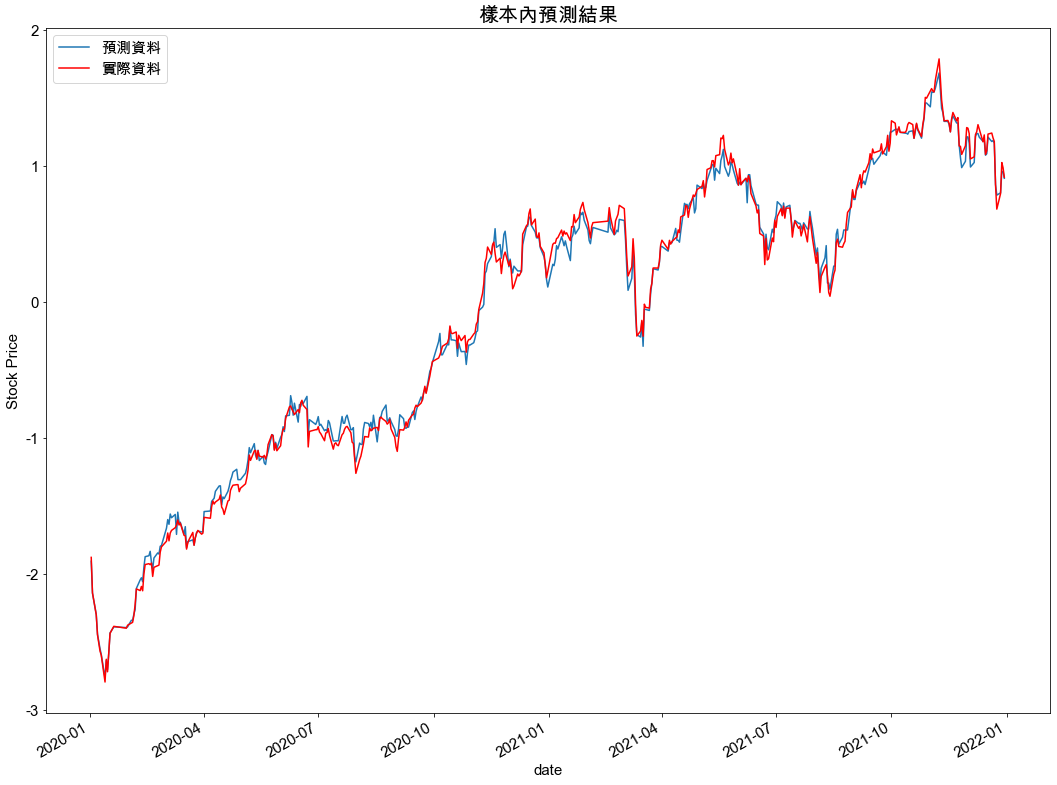

In [96]:
fig, ax1= plt.subplots(figsize =(18,14))
plt.plot(y_train.index ,y_pred_train ,lw=1.5, label = '預測資料')
plt.plot(y_train.index, y_train , lw=1.5, color='r', label='實際資料')
plt.xlabel('date', fontsize=15)
plt.ylabel('Stock Price',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15)
plt.title('樣本內預測結果',fontsize=20)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [ ]:
# model.fit(X_train, y_train, verbose=True)

In [44]:
y_pred_test = model.predict(X_test)

In [45]:
# r2_score(y_pred_test, y_test)

-0.44670375108176064

In [52]:
y_pred_test = model.predict(X_test)
cycle, trend = sm.tsa.filters.hpfilter(y_pred_test, 1) #將資料分成趨勢跟循環

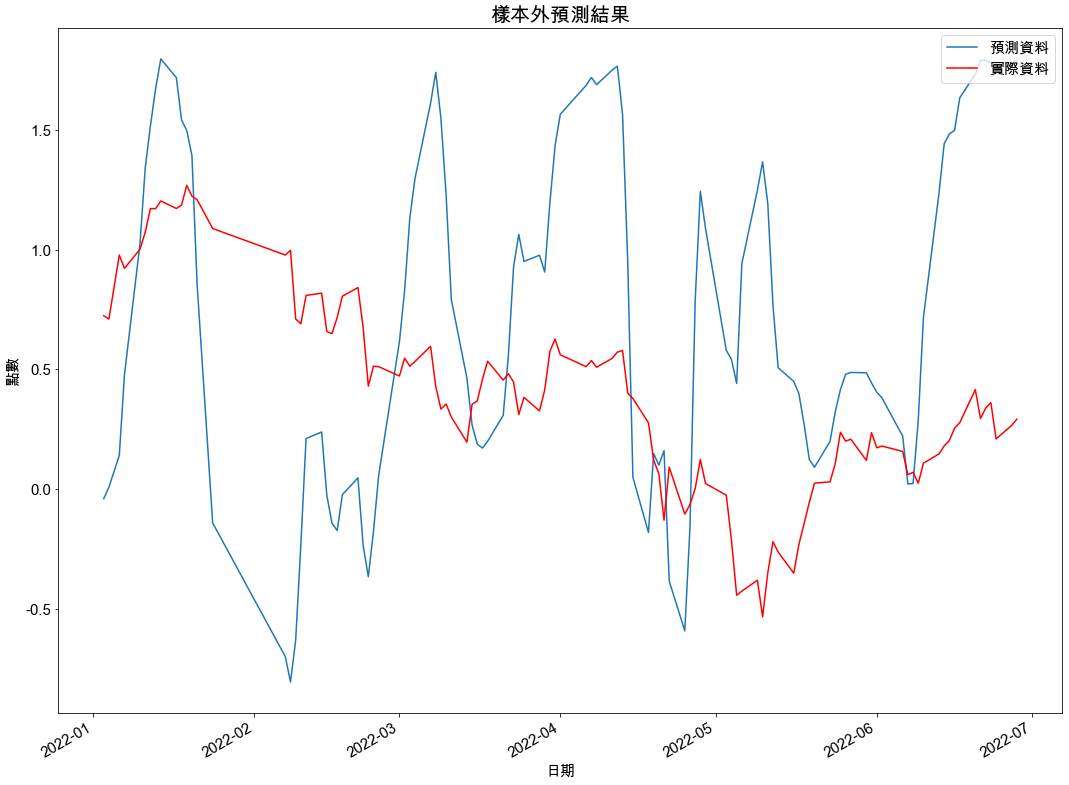

In [99]:
fig, ax1= plt.subplots(figsize =(18,14))
plt.plot(y_test.index ,trend ,lw=1.5, label = '預測資料')
plt.plot(y_test.index, y_test , lw=1.5, color='r', label='實際資料')
plt.xlabel('日期', fontsize = 15)
plt.ylabel('點數', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('樣本外預測結果', fontsize = 20)
plt.legend(loc=1, fontsize=15) 

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [ ]:
# df2['pct_X'] = df2['收盤'].pct_change(1)
# df2['pct_y'] = df2['指數收盤價'].pct_change(1)
# df2['pct_y'] = df2['pct_y'].shift(-1)

In [ ]:
# df2

In [ ]:
# df3 = df2.dropna()
# df3

In [ ]:
# X1 = df3[['pct_X']]
# y1 = df3[['pct_y']]

In [ ]:
# X1_train, X1_test = X1.loc[:"2021-12-31"], X1.loc["2021-12-31":]
# y1_train, y1_test = y1.loc[:"2021-12-31"], y1.loc["2021-12-31":]

In [ ]:
# model = XGBRegressor(n_estimators=500)
# model.fit(X1_train, y1_train, verbose=True)

In [ ]:
# y1_pred_train = model.predict(X1_train)

In [ ]:
# r2_score(y1_pred_train, y1_train)

In [ ]:
# fig, ax1= plt.subplots(figsize =(18,14))
# plt.plot(y1_train.index ,y1_pred_train ,lw=1.5, label = 'pre')
# plt.plot(y1_train.index, y1_train , lw=1.5, color='r', label='real')
# plt.xlabel('date')
# plt.ylabel('Stock Price')
# plt.title('industry VS index Stock Price')

# plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
# plt.show()

In [ ]:
# y1_pred_test = model.predict(X1_test)
# y1_pred_test

In [ ]:
# r2_score(y1_pred_test, y1_test)

In [ ]:
# fig, ax1= plt.subplots(figsize =(18,14))
# plt.plot(y1_test.index ,y1_pred_test ,lw=1.5, label = 'pre')
# plt.plot(y1_test.index, y1_test , lw=1.5, color='r', label='real')
# plt.xlabel('date')
# plt.ylabel('Stock Price')
# plt.title('industry VS index Stock Price')

# plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
# plt.show()

In [66]:
_2327a = _2327.rename(columns = {'年月日':'日期', '收盤價(元)':'國巨'})
df2327 = taipower1[['收盤']].merge(_2327a[['日期','國巨']], on='日期')
df2327.set_index(df2327['日期'],inplace=True)
df2327.drop(columns={'日期'}, inplace=True)
df2327.rename(columns={"收盤":'動態指數'}, inplace=True)

In [67]:
df2327

,動態指數,國巨
日期,,
2020-01-02,97.556,399.4567
2020-01-03,97.412,428.7746
2020-01-06,96.516,421.4451
2020-01-07,95.219,379.3006
2020-01-09,92.182,359.1445
...,...,...
2022-08-25,158.946,326.0000
2022-08-26,158.338,332.0000
2022-08-29,156.518,317.5000


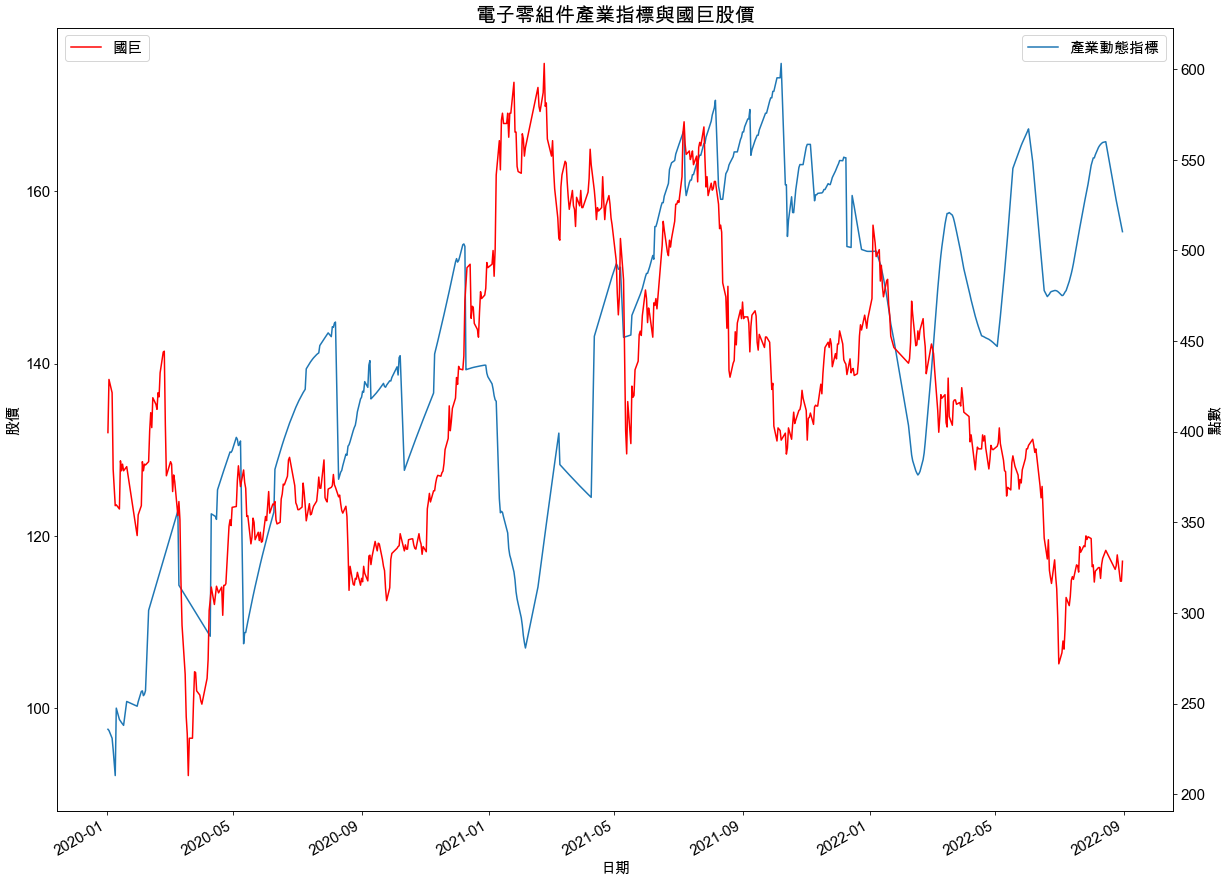

In [68]:
fig, ax1= plt.subplots(figsize =(20,16))
plt.plot(df2327.index , df2327['動態指數'],lw=1.5, label = '產業動態指標')                                       
plt.xlabel('日期', fontsize=15)
plt.ylabel('股價', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('電子零組件產業指標與國巨股價', fontsize=20)
plt.legend(loc=1, fontsize=15) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df2327.index, df2327['國巨'] , lw=1.5, color='r', label='國巨')
plt.yticks(fontsize=15)
plt.ylabel('點數',fontsize=15 )
plt.legend(loc=2 , fontsize=15)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [69]:
df2327['平移'] = df2327['國巨'].shift(-40)

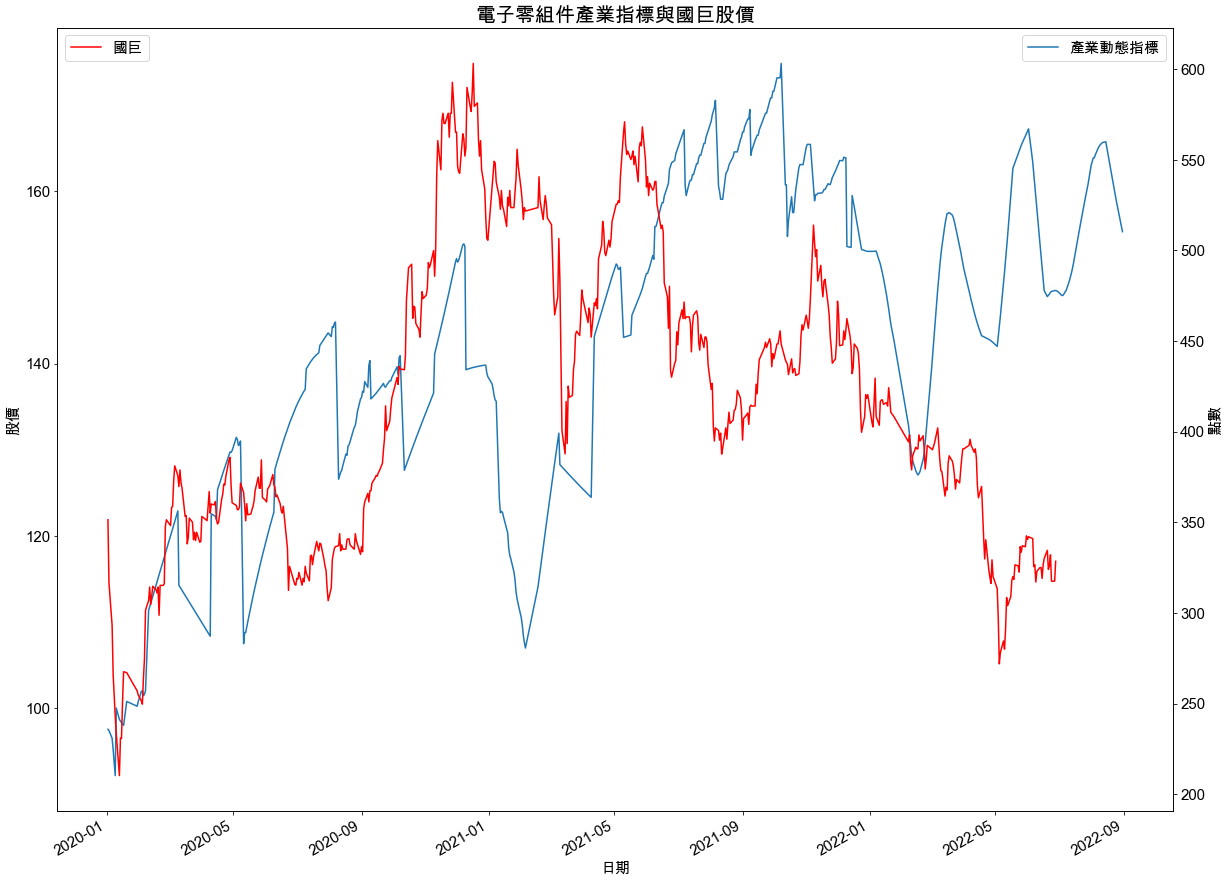

In [70]:
fig, ax1= plt.subplots(figsize =(20,16))
plt.plot(df2327.index , df2327['動態指數'],lw=1.5, label = '產業動態指標')                                       
plt.xlabel('日期', fontsize=15)
plt.ylabel('股價', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('電子零組件產業指標與國巨股價', fontsize=20)
plt.legend(loc=1, fontsize=15) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df2327.index, df2327['平移'] , lw=1.5, color='r', label='國巨')
plt.yticks(fontsize=15)
plt.ylabel('點數',fontsize=15 )
plt.legend(loc=2 , fontsize=15)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [71]:
df2327['stand_X'] = preprocessing.scale(df2327['動態指數'])
df2327['stand_y'] = preprocessing.scale(df2327['平移'])
df2327.dropna(inplace=True)

In [75]:
X2327 = df2327[['stand_X']]
y2327 = df2327[['stand_y']]
X2_train, X2_test = X2327.loc[:"2021-12-31"], X2327.loc["2021-12-31":]
y2_train, y2_test = y2327.loc[:"2021-12-31"], y2327.loc["2021-12-31":]

In [77]:
model = XGBRegressor(n_estimators=250)
model.fit(X2_train, y2_train, verbose=True)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [78]:
y2_pred_train = model.predict(X2_train)

In [79]:
r2_score(y2_pred_train, y2_train)

0.9938062338965011

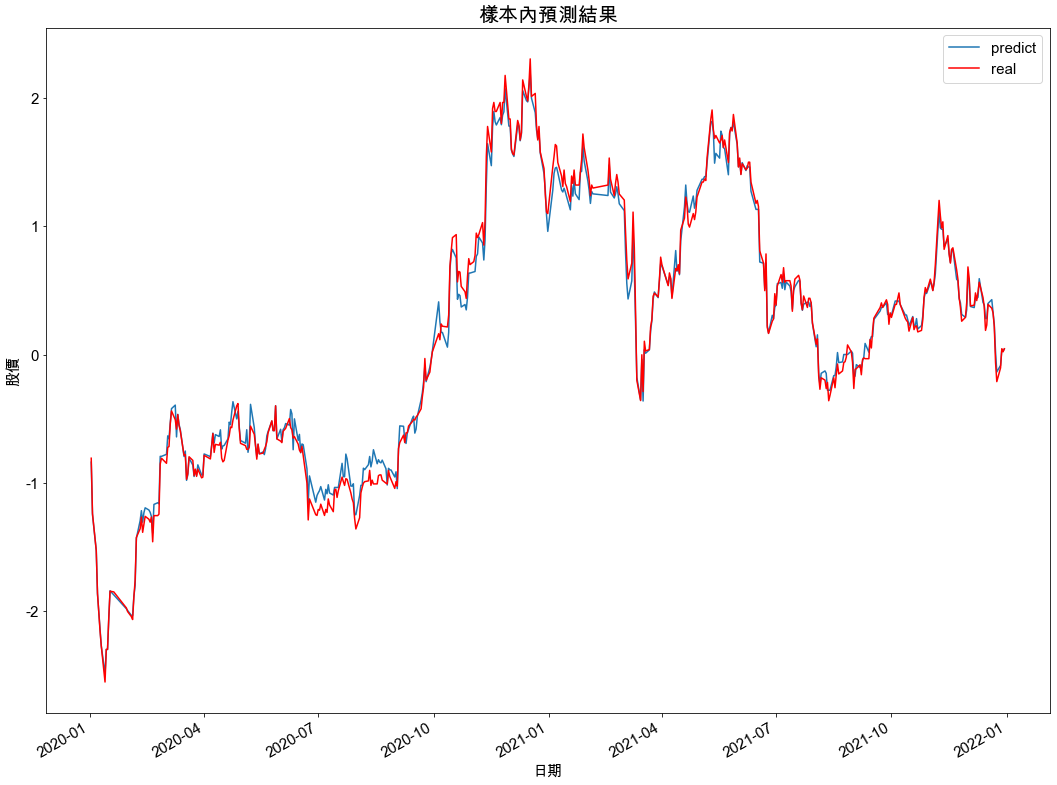

In [97]:
y2_pred_train = model.predict(X2_train)
fig, ax1= plt.subplots(figsize =(18,14))
plt.plot(y2_train.index ,y2_pred_train ,lw=1.5, label = 'predict')
plt.plot(y2_train.index, y2_train , lw=1.5, color='r', label='real')
plt.xlabel('日期', fontsize = 15)
plt.ylabel('股價', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='best', fontsize=15) 
plt.title('樣本內預測結果',fontsize = 20)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [89]:
y2_pred_test = model.predict(X2_test)
cycle, trend = sm.tsa.filters.hpfilter(y2_pred_test, 1) #將cycle跟trend分開

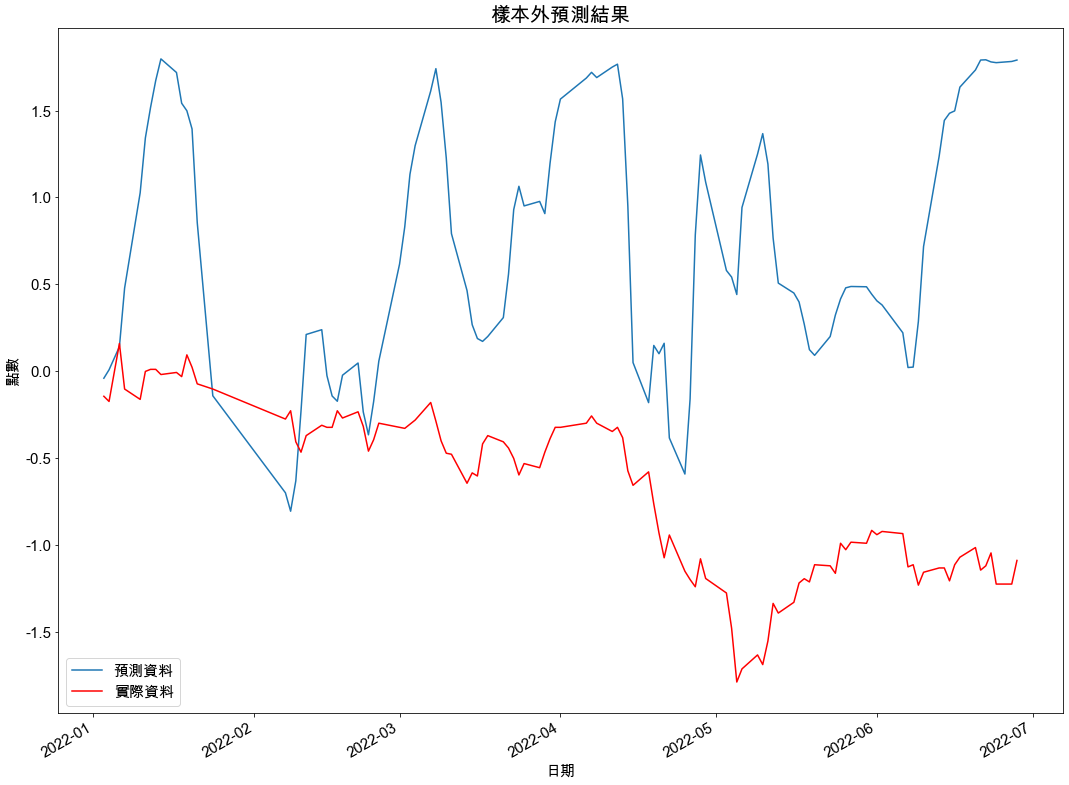

In [98]:
fig, ax1= plt.subplots(figsize =(18,14))
plt.plot(y2_test.index ,trend ,lw=1.5, label = '預測資料')
plt.plot(y2_test.index, y2_test , lw=1.5, color='r', label='實際資料')
plt.xlabel('日期', fontsize = 15)
plt.ylabel('點數', fontsize = 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('樣本外預測結果', fontsize = 20)
plt.legend(loc='best', fontsize=15) 

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

# classifier

In [ ]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df3['%'] = df3['指數收盤價'].pct_change(1)
df3['%'] = (df3[['%']].applymap(lambda x:1 if x>0 else 0)).shift(1)
df3 = df3.dropna()
df3

In [ ]:
X1 = df3.iloc[:,2:3]
y1 = df3.iloc[:,6:7]

In [ ]:
X_train1, X_test1 = X1.loc[:"2021-12-31"], X1.loc["2021-12-31":'2022-07-28']
y_train1, y_test1 = y1.loc[:"2021-12-31"], y1.loc["2021-12-31":'2022-07-28']

In [ ]:
y_test1

In [ ]:
model = XGBClassifier(use_label_encoder=False)

In [ ]:
model.fit(X_train1, y_train1, verbose=True)

In [ ]:
y_pred = model.predict(X_test1)
model.score(X_test1, y_test1)

In [ ]:
accuracy_score(y_test1, y_pred)

In [ ]:
b = []
c = df3.loc['2021-12-30']['指數收盤價']
for i in list(a):
    c = c*i
    b.append(c)

In [ ]:
b

In [ ]:
df3.loc['2021-12-31':]['指數收盤價']

In [ ]:
# model.score(y_pred, y_test)

In [ ]:
fig, ax1= plt.subplots(figsize =(20,16))
plt.plot(y_test.index ,y_pred ,lw=1.5, label = 'pre')
plt.plot(y_test.index, y_test , lw=1.5, color='r', label='real')
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.title('industry VS index Stock Price')

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

# --

In [ ]:
df1['後移'] = df1['指數收盤價'].shift(-30)
df1

In [ ]:
df2 = df[df['產業名稱'] =='半導體']

In [ ]:
df2

In [ ]:
df3 = df2.merge(df1[['日期','指數收盤價']], on='日期')

In [ ]:
df3 = df3.set_index(df3['日期'])

In [ ]:
fig, ax1= plt.subplots(figsize =(10,8))
plt.plot(df2['日期'] , df2['收盤'],lw=1.5, label = 'industry')                                       
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.title('industry VS index Stock Price')
plt.legend(loc=1) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df1['日期'], df1['指數收盤價'] , lw=1.5, color='r', label='index')
plt.ylabel('Stocl Price')
plt.legend(loc=2)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(df2['日期'], df2['%'])

In [ ]:
df2[['日期','收盤','%']].head(50)

In [ ]:
cycle, trend = sm.tsa.filters.hpfilter(df2['收盤'], 129600) #documents建議月資料用129600
TWFX_decomp = df2[['日期','收盤']]
TWFX_decomp.loc[:,'cycle'] = cycle
TWFX_decomp.loc[:,'trend'] = trend

In [ ]:
TWFX_decomp  = TWFX_decomp.set_index(TWFX_decomp['日期'])

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
TWFX_decomp[['收盤', 'cycle','trend']].plot(ax=ax, fontsize=16)
plt.show() #把trend跟原始資料畫在圖上

In [ ]:
fig, ax1= plt.subplots(figsize =(10,8))
plt.plot(TWFX_decomp.index , TWFX_decomp['trend'],lw=1.5, label = 'industry')                                       
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.title('industry VS index Stock Price')
plt.legend(loc=1) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df1['日期'], df1['指數收盤價'] , lw=1.5, color='r', label='index')
plt.ylabel('Stocl Price')
plt.legend(loc=2)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [ ]:
decomposition = sm.tsa.seasonal_decompose(df2['收盤'], period=250)

In [ ]:
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [ ]:
df2['%'] = df2['收盤'].pct_change(1)*100

In [ ]:
df2['%'].sort_values()

In [ ]:
df1['%1'] = df1['指數收盤價'].pct_change(1)*100

In [ ]:
df2['%'].max()

In [ ]:
fig, ax1= plt.subplots(figsize =(20,16))
plt.plot(df2['日期'] , df2['%'],lw=1.5, label = 'industry')                                       
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.title('industry VS index Stock Price')
plt.legend(loc=1) 

ax2 = ax1.twinx() #跟第一張ax1的x軸一樣
plt.plot(df1['日期'], df1['%1'] , lw=1.5, color='r', label='index')
plt.ylabel('Stocl Price')
plt.legend(loc=2)

plt.gcf().autofmt_xdate() #讓x軸的時間軸比較寬鬆、漂亮
plt.show()

In [ ]:
X_test
